In [ ]:
!nvidia-smi

Wed Jun  8 13:24:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## YOLOv5 Setup
* Clone YOLOv5 into repository.
* https://github.com/ultralytics/yolov5.git

In [ ]:
!git clone https://github.com/ultralytics/yolov5 
%cd yolov5
%pip install -qr requirements.txt

%cd ..

Cloning into 'yolov5'...
remote: Enumerating objects: 12192, done.
remote: Total 12192 (delta 0), reused 0 (delta 0), pack-reused 12192
Receiving objects: 100% (12192/12192), 11.95 MiB | 32.10 MiB/s, done.
Resolving deltas: 100% (8441/8441), done.
/content/yolov5
     |████████████████████████████████| 596 kB 8.6 MB/s 
/content


## Import Packages

In [ ]:
import pandas as pd
import numpy as np
import os
import glob

import xml.etree.ElementTree as ET 
import cv2
import matplotlib.pyplot as plt

## Download and Unzip dataset from Google Drive

In [ ]:
!gdown --id 'YourGoogleDriveID' --output dataset.zip

!unzip "dataset.zip"

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1cXFJkWN__BddRvhCKaINpRWqxTCGd0IF
To: /content/dataset.zip
100% 417M/417M [00:01<00:00, 303MB/s]
Archive:  dataset.zip
  inflating: annotations/maksssksksss0.xml  
  inflating: annotations/maksssksksss1.xml  
  inflating: annotations/maksssksksss10.xml  
  inflating: annotations/maksssksksss100.xml  
  inflating: annotations/maksssksksss101.xml  
  inflating: annotations/maksssksksss102.xml  
  inflating: annotations/maksssksksss103.xml  
  inflating: annotations/maksssksksss104.xml  
  inflating: annotations/maksssksksss105.xml  
  inflating: annotations/maksssksksss106.xml  
  inflating: annotations/maksssksksss107.xml  
  inflating: annotations/maksssksksss108.xml  
  inflating: annotations/maksssksksss109.xml  

## Setup file path

In [ ]:
input_file_path = "/content"
output_file_path = "/content"
annotation_folder = "/content/annotations"
image_folder = "/content/images"

## Convert Original Annotation into YOLOv5 Format
* Read data and extract into pandas DataFrame

In [ ]:
dataset = {
            "file":[],
            "name":[],    
            "width":[],
            "height":[],
            "xmin":[],
            "ymin":[],   
            "xmax":[],
            "ymax":[],
           }

* Using "xml.etree.ElementTree" to read .xml file
* Reference: https://docs.python.org/3/library/xml.etree.elementtree.html 

In [ ]:
count = 0
for annotaion_file in glob.glob(annotation_folder+"/*.xml"):
    count += 1
    print("File No. %s has generated into YOLO format!" %str(count))
    
    # Obtaining the element tree of target file
    element_tree = ET.parse(annotaion_file)

    for element in element_tree.iter():
        
        if 'size' in element.tag:
            for attribute in list(element):
                if 'width' in attribute.tag: 
                    width = int(round(float(attribute.text)))
                if 'height' in attribute.tag:
                    height = int(round(float(attribute.text)))
        
        if 'object' in element.tag:
            for attribute in list(element):
                if 'name' in attribute.tag:
                    name = attribute.text                 
                    dataset['name']+=[name]
                    dataset['width']+=[width]
                    dataset['height']+=[height] 
                    dataset['file']+=[annotaion_file.split('/')[-1][0:-4]] 
                            
                if 'bndbox' in attribute.tag:
                    for dimension in list(attribute):
                        if 'xmin' in dimension.tag:
                            xmin = int(round(float(dimension.text)))
                            dataset['xmin']+=[xmin]
                        if 'ymin' in dimension.tag:
                            ymin = int(round(float(dimension.text)))
                            dataset['ymin']+=[ymin]                                
                        if 'xmax' in dimension.tag:
                            xmax = int(round(float(dimension.text)))
                            dataset['xmax']+=[xmax]                                
                        if 'ymax' in dimension.tag:
                            ymax = int(round(float(dimension.text)))
                            dataset['ymax']+=[ymax]

dataframe = pd.DataFrame(dataset)
print("The first 10 data are:")
dataframe.head(10)

File No. 1 has generated into YOLO format!
File No. 2 has generated into YOLO format!
File No. 3 has generated into YOLO format!
File No. 4 has generated into YOLO format!
File No. 5 has generated into YOLO format!
File No. 6 has generated into YOLO format!
File No. 7 has generated into YOLO format!
File No. 8 has generated into YOLO format!
File No. 9 has generated into YOLO format!
File No. 10 has generated into YOLO format!
File No. 11 has generated into YOLO format!
File No. 12 has generated into YOLO format!
File No. 13 has generated into YOLO format!
File No. 14 has generated into YOLO format!
File No. 15 has generated into YOLO format!
File No. 16 has generated into YOLO format!
File No. 17 has generated into YOLO format!
File No. 18 has generated into YOLO format!
File No. 19 has generated into YOLO format!
File No. 20 has generated into YOLO format!
File No. 21 has generated into YOLO format!
File No. 22 has generated into YOLO format!
File No. 23 has generated into YOLO forma

,file,name,width,height,xmin,ymin,xmax,ymax
0,maksssksksss702,with_mask,600,317,9,170,60,229
1,maksssksksss702,with_mask,600,317,165,90,202,124
2,maksssksksss702,with_mask,600,317,175,175,244,260
3,maksssksksss702,with_mask,600,317,303,127,360,191
4,maksssksksss702,mask_weared_incorrect,600,317,340,66,380,111
5,maksssksksss702,with_mask,600,317,379,63,408,98
6,maksssksksss702,with_mask,600,317,433,61,471,105
7,maksssksksss702,with_mask,600,317,477,78,536,133
8,maksssksksss702,with_mask,600,317,569,37,592,67
9,maksssksksss702,with_mask,600,317,367,192,437,259


* Change the original label into int:
    * <name>with_mask</name> => 0
    * <name>mask_weared_incorrect</name> => 1
    * <name>without_mask</name> => 2
* This is because the label of YOLO needs integer

In [ ]:
name = {
    'with_mask': 0,
    'mask_weared_incorrect': 1,
    'without_mask': 2 
}

# Using df.map to change annotation
# Remap : 'name' -> 'class'
dataframe['class'] = dataframe['name'].map(name)

print("Annotation has changed!!")
print("The first 10 data are:")
dataframe.head(10)

Annotation has changed!!
The first 10 data are:


,file,name,width,height,xmin,ymin,xmax,ymax,class
0,maksssksksss702,with_mask,600,317,9,170,60,229,0
1,maksssksksss702,with_mask,600,317,165,90,202,124,0
2,maksssksksss702,with_mask,600,317,175,175,244,260,0
3,maksssksksss702,with_mask,600,317,303,127,360,191,0
4,maksssksksss702,mask_weared_incorrect,600,317,340,66,380,111,1
5,maksssksksss702,with_mask,600,317,379,63,408,98,0
6,maksssksksss702,with_mask,600,317,433,61,471,105,0
7,maksssksksss702,with_mask,600,317,477,78,536,133,0
8,maksssksksss702,with_mask,600,317,569,37,592,67,0
9,maksssksksss702,with_mask,600,317,367,192,437,259,0


## Creating Training, Valisation and Testing Dataset
* We are using "sklearn.model_selection" for convinience
* Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
files = os.listdir(image_folder)
print("All pictures are loaded! (Total: %s images in the dataset.)"%str(len(files)))

All pictures are loaded! (Total: 853 images in the dataset.)


In [ ]:
from sklearn.model_selection import train_test_split
# Split training and testing dataset
training_dataset, testing_dataset = train_test_split(files, test_size=0.2, random_state=10)
test_dataset, validation_dataset = train_test_split(files, test_size=0.8, random_state=10)

print("Amount of images (Training/Validation/Testing): " + str(len(training_dataset)) +"/"+ str(len(validation_dataset)) +"/"+ str(len(testing_dataset)))

Amount of images (Training/Validation/Testing): 682/683/171


## Create YOLO configuration files
* Make Dir : train | validate | test

In [ ]:
os.mkdir('./yolov5/data/train')
os.mkdir('./yolov5/data/validation')
os.mkdir('./yolov5/data/test')
os.mkdir('./yolov5/data/train/images')
os.mkdir('./yolov5/data/train/labels')
os.mkdir('./yolov5/data/test/images')
os.mkdir('./yolov5/data/test/labels')
os.mkdir('./yolov5/data/validation/images')
os.mkdir('./yolov5/data/validation/labels')

* Resize Image and put into folder

In [ ]:
from PIL import Image

def writeImage(image_list, folder):
    count = 0
    print("Start proccessing", str(folder))
    for img in image_list:
        print("Proccessing Image No. ", count)
        count += 1
        image = Image.open(input_file_path + "/images/" + img)
        resize_image = image.resize((640,480))
        _ = resize_image.save(output_file_path + "/yolov5/data/" + folder + "/images/" + img)
    return

writeImage(training_dataset, "train")
writeImage(validation_dataset, "validation")
writeImage(testing_dataset, "test")
print("All image has resized and copy to the designated folder!")

Start proccessing train
Proccessing Image No.  0
Proccessing Image No.  1
Proccessing Image No.  2
Proccessing Image No.  3
Proccessing Image No.  4
Proccessing Image No.  5
Proccessing Image No.  6
Proccessing Image No.  7
Proccessing Image No.  8
Proccessing Image No.  9
Proccessing Image No.  10
Proccessing Image No.  11
Proccessing Image No.  12
Proccessing Image No.  13
Proccessing Image No.  14
Proccessing Image No.  15
Proccessing Image No.  16
Proccessing Image No.  17
Proccessing Image No.  18
Proccessing Image No.  19
Proccessing Image No.  20
Proccessing Image No.  21
Proccessing Image No.  22
Proccessing Image No.  23
Proccessing Image No.  24
Proccessing Image No.  25
Proccessing Image No.  26
Proccessing Image No.  27
Proccessing Image No.  28
Proccessing Image No.  29
Proccessing Image No.  30
Proccessing Image No.  31
Proccessing Image No.  32
Proccessing Image No.  33
Proccessing Image No.  34
Proccessing Image No.  35
Proccessing Image No.  36
Proccessing Image No.  3

* Convert YOLO format label

In [ ]:
dataframe['xmax'] = (640/dataframe['width'])*dataframe['xmax']
dataframe['ymax'] = (480/dataframe['height'])*dataframe['ymax']

dataframe['xmin'] = (640/dataframe['width'])*dataframe['xmin']
dataframe['ymin'] = (480/dataframe['height'])*dataframe['ymin']

dataframe[['xmax', 'ymax', 'xmin', 'ymin']] = dataframe[['xmax', 'ymax', 'xmin', 'ymin']].astype('int64')

dataframe['x_center'] = (dataframe['xmax']+dataframe['xmin'])/(2*640)
dataframe['y_center'] = (dataframe['ymax']+dataframe['ymin'])/(2*480)

dataframe['box_height'] = (dataframe['xmax']-dataframe['xmin'])/(640)
dataframe['box_width'] = (dataframe['ymax']-dataframe['ymin'])/(480)

dataframe.head(10)
dataframe = dataframe.astype('string')

* Generate Label txt file

In [ ]:
def writeLabel(image_list, folder):
    print("Enter process: ", folder)
    file_lists = []
    for f in image_list:
        tmp = f.split(".")[0]
        file_lists.append(tmp)
    count = 0
    for name in file_lists:
        print("Processing No.", count)
        count += 1
        data = dataframe[dataframe.file==name]
        box_list = []
   
        for index in range(len(data)):
                row = data.iloc[index]
                box_list.append(row['class']+" "+row["x_center"]+" "+row["y_center"]+" "+row["box_height"]+" "+row["box_width"])

                text = "\n".join(box_list)
                with open(output_file_path+"/yolov5/data/"+folder+"/labels/"+name+".txt", "w") as file:
                    file.write(text)
    return

writeLabel(training_dataset, "train")
writeLabel(validation_dataset, "validation")
writeLabel(testing_dataset, "test")
print("All label has modified and copy to the designated folder!")

Enter process:  train
Processing No. 0
Processing No. 1
Processing No. 2
Processing No. 3
Processing No. 4
Processing No. 5
Processing No. 6
Processing No. 7
Processing No. 8
Processing No. 9
Processing No. 10
Processing No. 11
Processing No. 12
Processing No. 13
Processing No. 14
Processing No. 15
Processing No. 16
Processing No. 17
Processing No. 18
Processing No. 19
Processing No. 20
Processing No. 21
Processing No. 22
Processing No. 23
Processing No. 24
Processing No. 25
Processing No. 26
Processing No. 27
Processing No. 28
Processing No. 29
Processing No. 30
Processing No. 31
Processing No. 32
Processing No. 33
Processing No. 34
Processing No. 35
Processing No. 36
Processing No. 37
Processing No. 38
Processing No. 39
Processing No. 40
Processing No. 41
Processing No. 42
Processing No. 43
Processing No. 44
Processing No. 45
Processing No. 46
Processing No. 47
Processing No. 48
Processing No. 49
Processing No. 50
Processing No. 51
Processing No. 52
Processing No. 53
Processing No. 5

## Model Configuration

In [ ]:
%cd yolov5

text="train: data/train/images\nval: data/train/images\n\nnc: 3\nnames: ['with_mask', 'mask_weared_incorrect', 'without_mask']"
with open("data/data.yaml",'w') as file:
    file.write(text)

%cat data/data.yaml

print(" 'data.yaml' created")

# Modified config file
!sed -i "s/nc: 80/nc: 3/g" models/yolov5n.yaml
!head models/yolov5n.yaml


/content/yolov5
train: data/train/images
val: data/train/images

nc: 3
names: ['with_mask', 'mask_weared_incorrect', 'without_mask'] 'data.yaml' created
# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 3  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.25  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32


## Training

In [ ]:
!python train.py --img 640 --batch 32 --epochs 50 --data data/data.yaml --cfg models/yolov5n.yaml --weights yolov5n.pt --name yolov5n_results  --cache

train: weights=yolov5n.pt, cfg=models/yolov5n.yaml, data=data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5n_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.01

In [ ]:
# Continue Training
!python train.py --img 640 --batch 32 --epochs 50 --data data/data.yaml --cfg models/yolov5n.yaml --weights /content/yolov5/runs/train/yolov5n_results2/weights/last.pt --name yolov5n_results  --cache

python3: can't open file 'train.py': [Errno 2] No such file or directory


## Training Result
* Visualize Training

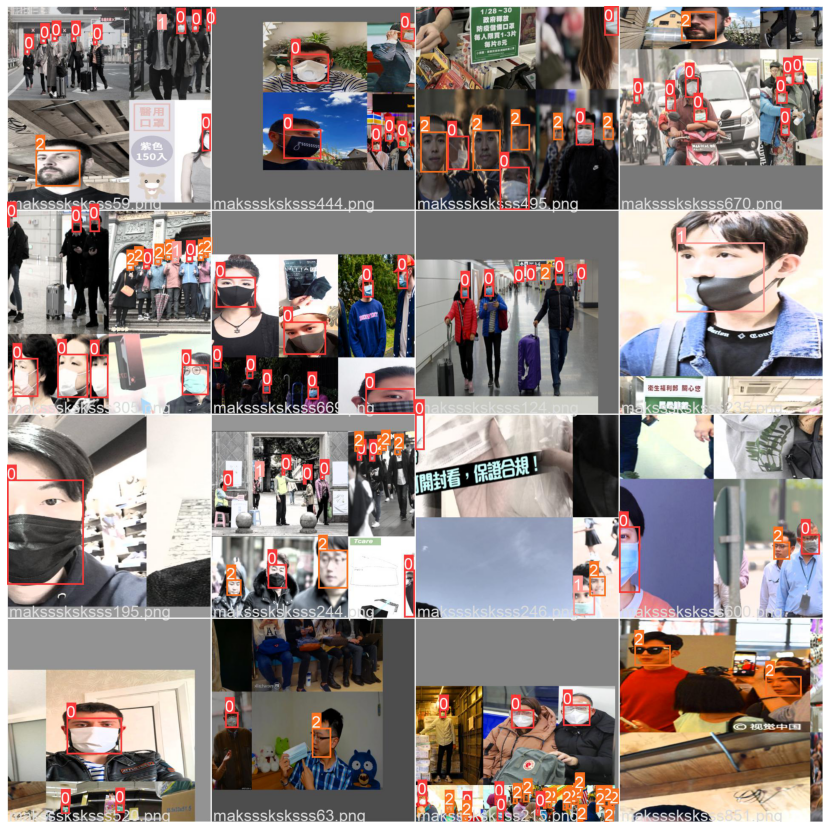

In [ ]:
img = plt.imread('runs/train/yolov5n_results/train_batch0.jpg')
plt.figure(figsize=(20,15))
plt.imshow(img)
plt.axis('off')
plt.show()

* Visualize Testing
    * Results are saved inside /detect/Test dir

In [ ]:
#!python detect.py --source data/test/images/ --weight runs/train/yolov5n_results3/weights/best.pt --name Test --conf 0.4

%cd yolov5
!python detect.py --source data/test/images/ --weight /content/3rd_train_best.pt --name Test --conf 0.4

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5
detect: weights=['/content/3rd_train_best.pt'], source=data/test/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=Test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-246-g2dd3db0 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5n summary: 213 layers, 1763224 parameters, 0 gradients, 4.2 GFLOPs
image 1/171 /content/yolov5/data/test/images/maksssksksss102.png: 480x640 2 with_masks, Done. (0.014s)
image 2/171 /content/yolov5/data/test/images/maksssksksss109.png: 480x640 1 with_mask, Done. (0.014s)
image 3/171 /content/yolov5/data/test/images/maksssksksss116.png: 480x640 5 with_masks, Done. (0.0

In [ ]:
!zip -r /content/output.zip /content/yolov5/runs/detect/Test2

from google.colab import files
files.download("/content/output.zip")


  adding: content/yolov5/runs/detect/Test2/ (stored 0%)
  adding: content/yolov5/runs/detect/Test2/maksssksksss408.png (deflated 3%)
  adding: content/yolov5/runs/detect/Test2/maksssksksss296.png (deflated 5%)
  adding: content/yolov5/runs/detect/Test2/maksssksksss520.png (deflated 3%)
  adding: content/yolov5/runs/detect/Test2/maksssksksss67.png (deflated 2%)
  adding: content/yolov5/runs/detect/Test2/maksssksksss806.png (deflated 2%)
  adding: content/yolov5/runs/detect/Test2/maksssksksss741.png (deflated 2%)
  adding: content/yolov5/runs/detect/Test2/maksssksksss782.png (deflated 2%)
  adding: content/yolov5/runs/detect/Test2/maksssksksss643.png (deflated 3%)
  adding: content/yolov5/runs/detect/Test2/maksssksksss65.png (deflated 1%)
  adding: content/yolov5/runs/detect/Test2/maksssksksss444.png (deflated 2%)
  adding: content/yolov5/runs/detect/Test2/maksssksksss467.png (deflated 2%)
  adding: content/yolov5/runs/detect/Test2/maksssksksss109.png (deflated 2%)
  adding: content/yolo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>